In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
os.getcwd()

'D:\\project\\pycon\\DA\\Exercise'

In [2]:
fec = pd.read_csv('D:/project/00_source/python_data_analysis/P00000001-ALL.csv ')

C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [4]:
fec.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

 ,候选人id,候选人姓名，赞助者姓名，城市，街道，邮政编码，雇主，职业，赞助额度，赞助日期，

In [5]:
fec.head(10)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [6]:
fec.describe()

,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


In [7]:
# 全部的候选人名单
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [8]:
unique_cands[1]

'Romney, Mitt'

In [9]:
# 用字典说明党派关系
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',# 共和党党员
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',# 民主党人
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'} 

In [10]:
# 根据候选人姓名得到党派信息
fec.cand_nm[1234:1245].map(parties)

1234    Republican
1235    Republican
1236    Republican
1237    Republican
1238    Republican
1239    Republican
1240    Republican
1241    Republican
1242    Republican
1243    Republican
1244    Republican
Name: cand_nm, dtype: object

In [11]:
# 将党派信息添加为一个新列
fec['party'] = fec.cand_nm.map(parties)
print(fec.head())

     cmte_id    cand_id             cand_nm           contbr_nm  \
0  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
1  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
2  C00410118  P20002978  Bachmann, Michelle       SMITH, LANIER   
3  C00410118  P20002978  Bachmann, Michelle    BLEVINS, DARONDA   
4  C00410118  P20002978  Bachmann, Michelle  WARDENBURG, HAROLD   

          contbr_city contbr_st   contbr_zip        contbr_employer  \
0              MOBILE        AL   3.6601e+08                RETIRED   
1              MOBILE        AL   3.6601e+08                RETIRED   
2              LANETT        AL  3.68633e+08  INFORMATION REQUESTED   
3             PIGGOTT        AR  7.24548e+08                   NONE   
4  HOT SPRINGS NATION        AR  7.19016e+08                   NONE   

       contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc  \
0                RETIRED              250.0        20-JUN-11          NaN   
1               

In [12]:
# value_count用于计算各值出现的频率
# 计算党派支持数
fec.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [13]:
# 出资和退款比例
(fec.contb_receipt_amt>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [14]:
# 为了简化分析，我们选出正的出资（去掉退款）
fec = fec[fec.contb_receipt_amt > 0]

In [15]:
fec.cand_nm.value_counts()

Obama, Barack                     589127
Paul, Ron                         143161
Romney, Mitt                      105155
Gingrich, Newt                     46883
Santorum, Rick                     46245
Cain, Herman                       20052
Bachmann, Michelle                 13082
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Huntsman, Jon                       4066
Pawlenty, Timothy                   3844
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Name: cand_nm, dtype: int64

In [16]:
# Obama 和 Romney 是主要的两名候选人
# 我们准备一个子集只包含两人的竞选活动的赞助信息
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]
fec_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


### 根据职业和雇主统计赞助信息

In [17]:
# 根据职业计算出资总额
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [18]:
# 利用dict.get 允许没有映射的职业也能通过
# dict.get()
# Return the value for key if key is in the dictionary, else default
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO' }
f = lambda x:occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)
fec.contbr_occupation.value_counts()[:10]

RETIRED         233990
NOT PROVIDED     57151
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
ENGINEER         14334
TEACHER          13990
CONSULTANT       13273
PROFESSOR        12555
NOT EMPLOYED      9828
Name: contbr_occupation, dtype: int64

In [19]:
fec.contbr_employer.value_counts()[:10]

RETIRED                                   206675
SELF-EMPLOYED                              94505
NOT EMPLOYED                               45877
INFORMATION REQUESTED                      36135
SELF                                       24385
INFORMATION REQUESTED PER BEST EFFORTS     22260
NONE                                       19929
HOMEMAKER                                  18269
SELF EMPLOYED                               6274
REQUESTED                                   4233
Name: contbr_employer, dtype: int64

In [20]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED', }
f = lambda x:emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [21]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party',
                               aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


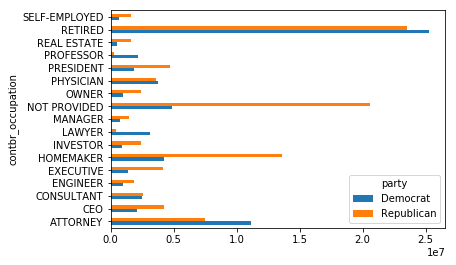

In [24]:
over_2mm.plot(kind='barh')

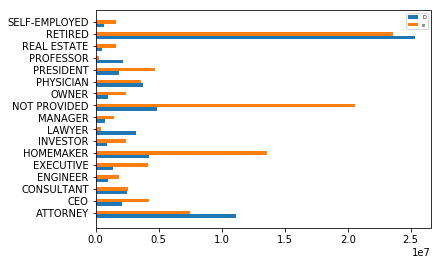

In [57]:
# 利用matplotlib实现，未完成
# bar(y, width, height, left, *, align='center', **kwargs)
fig,ax = plt.subplots()
height = np.arange(0,len(over_2mm.index),1)
ax.barh(np.arange(0,len(over_2mm.index),1),over_2mm.Democrat,height=0.3)
ax.legend('Republican',fontsize=5)
ax.barh(np.arange(0,len(over_2mm.index),1)+0.3,over_2mm.Republican,height=0.3,
       tick_label=over_2mm.index)
ax.legend('Democrat',fontsize=5)

### 对各党派出资额最高的职业

In [70]:
# 对候选人分组，然后求取最大值
def get_top_amounts(groups,key,n=5):
    totals = groups.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [71]:
# 通过候选人分组
grouped = fec_mrbo.groupby('cand_nm')
# 传给apply的函数能够接收其他参数或关键字，
# 则可以将这些内容放在函数名后面传入
# tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [72]:
# 根据雇主进行聚合
grouped.apply(get_top_amounts,'contbr_employer',n=7)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                              7409860.98
               STUDENT                                     496490.94
               CREDIT SUISSE                               281150.00
               MORGAN STANLEY                    

In [74]:
# 对出资额分组
# 利用cut函数根据出资额的大小将数据离散到多个面元
bins = np.array([0, 1, 10, 100, 1000, 10000,100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [82]:
# 根据候选人姓名以及面元标签对数据进行分组
grouped = fec_mrbo.groupby(['cand_nm',labels])
grouped.size()

cand_nm        contb_receipt_amt  
Obama, Barack  (0, 1]                    493
               (1, 10]                 40070
               (10, 100]              372280
               (100, 1000]            153991
               (1000, 10000]           22284
               (10000, 100000]             2
               (100000, 1000000]           3
               (1000000, 10000000]         4
Romney, Mitt   (0, 1]                     77
               (1, 10]                  3681
               (10, 100]               31853
               (100, 1000]             43357
               (1000, 10000]           26186
               (10000, 100000]             1
dtype: int64

In [83]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [86]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [89]:
bucket_sums.sum(axis=1)

contb_receipt_amt
(0, 1]                 3.952400e+02
(1, 10]                3.670873e+05
(10, 100]              2.227677e+07
(100, 1000]            7.716191e+07
(1000, 10000]          1.156959e+08
(10000, 100000]        7.180000e+04
(100000, 1000000]      1.490683e+06
(1000000, 10000000]    7.148840e+06
dtype: float64

In [93]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


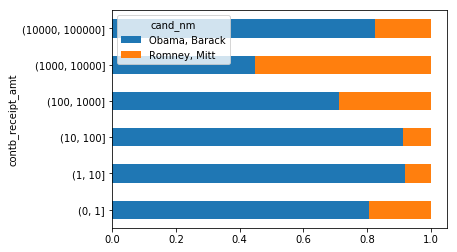

In [95]:
# 排除最大的两个面元
normed_sums[:-2].plot(kind='barh',stacked=True)

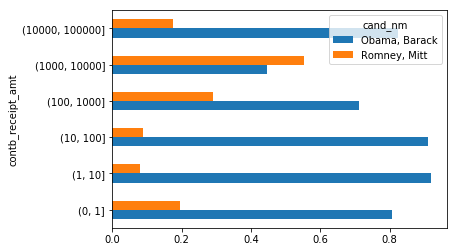

In [97]:
normed_sums[:-2].plot(kind='barh')

In [101]:
# 根据州统计赞助信息
# 根据候选人和州进行聚合
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals.head()

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
